In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import nc_time_axis
import xesmf
import matplotlib.gridspec as gridspec

#from cmip6_preprocessing.preprocessing import full_preprocessing

import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [2]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
col

pangeo-cmip6-ESM Collection with 28691 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28691 zstore(s)

	> 59 dcpp_init_year(s)

In [3]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'zstore',
       'dcpp_init_year'],
      dtype='object')

In [4]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 29,
                   'values': ['ssp370', 'esm-ssp585', '1pctCO2-bgc', 'hist-bgc',
                              '1pctCO2', 'abrupt-4xCO2', 'historical',
                              'piControl', 'amip', 'esm-hist', 'esm-piControl',
                              'hist-GHG', 'hist-aer', 'hist-nat', 'dcppA-assim',
                              'dcppA-hindcast', 'dcppC-hindcast-noAgung',
                              'dcppC-hindcast-noElChichon',
                              'dcppC-hindcast-noPinatubo', 'highresSST-present',
                              'control-1950', 'hist-1950', 'deforest-globe',
                              'esm-ssp585-ssp126Lu', 'omip1', 'lgm', 'ssp126',
                              'ssp245', 'ssp585']},
 'source_id': {'count': 48,
               'values': ['BCC-ESM1', 'BCC-CSM2-MR', 'CanESM5', 'CNRM-ESM2-1',
                          'UKESM1-0-LL', 'GISS-E2-1-G', 'CESM2', 'GFDL-ESM4',
                          'AWI-CM-1-1-MR', 'CAM

In [5]:
variable='thetao'
freq='Omon'

In [6]:
cat = col.search(experiment_id=['historical'], table_id=freq, variable_id=variable, grid_label='gr')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
5765,CMIP,E3SM-Project,E3SM-1-0,historical,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/E3SM-Project/E3SM-1-0/historic...,NaN
12617,CMIP,NASA-GISS,GISS-E2-1-H,historical,r10i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NASA-GISS/GISS-E2-1-H/historic...,NaN
13412,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r1...,NaN
14268,CMIP,NCAR,CESM2,historical,r10i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN
14438,CMIP,NCAR,CESM2,historical,r11i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r11i1p1f...,NaN
14603,CMIP,NCAR,CESM2,historical,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r1i1p1f1...,NaN
14768,CMIP,NCAR,CESM2,historical,r2i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r2i1p1f1...,NaN
14933,CMIP,NCAR,CESM2,historical,r3i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r3i1p1f1...,NaN
15098,CMIP,NCAR,CESM2,historical,r4i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r4i1p1f1...,NaN
15262,CMIP,NCAR,CESM2,historical,r5i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP/NCAR/CESM2/historical/r5i1p1f1...,NaN


In [7]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 7 group(s)


In [8]:
dset_dict.keys()

dict_keys(['CMIP.E3SM-Project.E3SM-1-0.historical.Omon.gr', 'CMIP.NASA-GISS.GISS-E2-1-H.historical.Omon.gr', 'CMIP.NCAR.CESM2.historical.Omon.gr', 'CMIP.NCAR.CESM2-WACCM.historical.Omon.gr', 'CMIP.NCC.NorCPM1.historical.Omon.gr', 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr', 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr'])

In [11]:
dset_dict['CMIP.E3SM-Project.E3SM-1-0.historical.Omon.gr']

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 180, lev: 60, lon: 360, member_id: 1, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lev        (lev) float64 5.0 15.0 25.0 ... 4.875e+03 5.125e+03 5.375e+03
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds
Data variables:
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(60, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    thetao     (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 12, 60, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:              

# get WOA basin mask

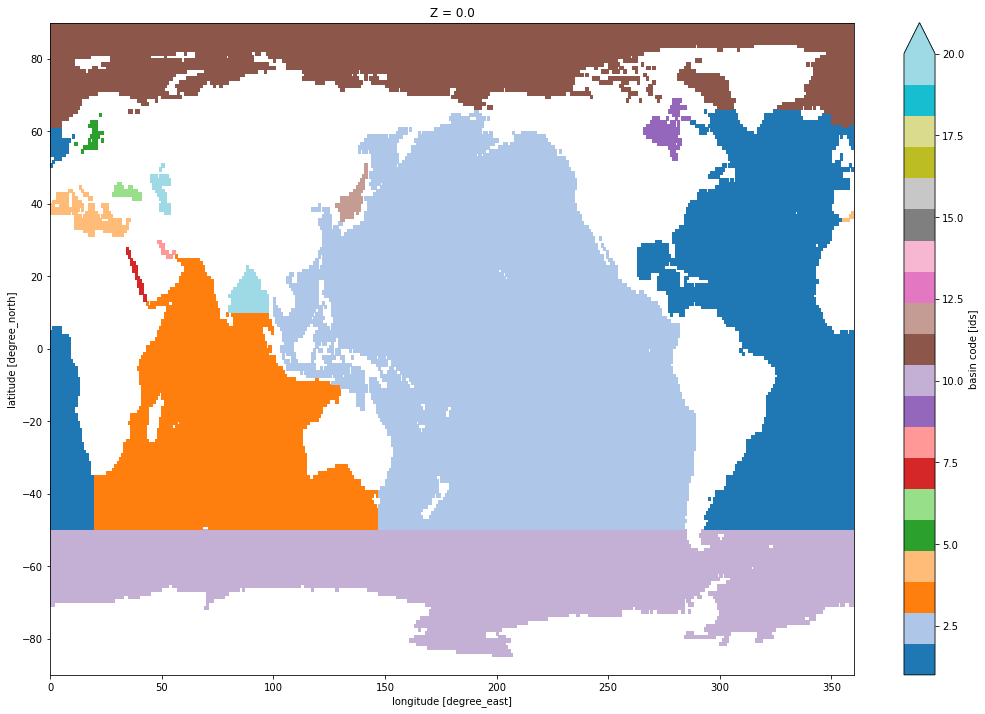

In [12]:
basin = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA05/.Masks/.basin/dods').isel(Z=0).load()
basin.basin.plot(vmax=20, cmap='tab20', figsize=(18, 12))

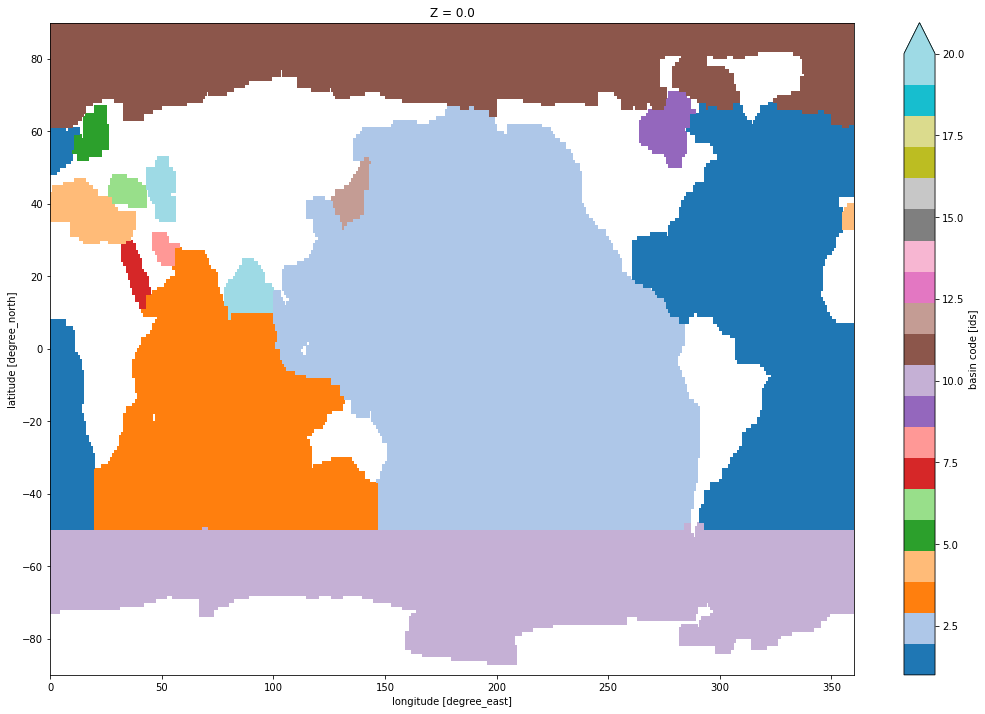

In [13]:
basin_fill = (basin.basin.ffill('Y', 2).bfill('Y', 2)
                         .ffill('X', 2).bfill('X', 2))
basin_fill.plot(vmax=20, cmap='tab20', figsize=(18, 12))

regions={1:'Atlantic Ocean',
         2:'Pacific Ocean',
         3:'Indian Ocean',
         4:'Mediterranean Sea',
         5:'Baltic Sea',
         6:'Black Sea',
         7:'Red Sea',
         8:'Persian Gulf',
         9:'Hudson Bay',
         10:'Southern Ocean',
         11:'Arctic Ocean',
         12:'Sea of Japan'} # many more, see https://data.nodc.noaa.gov/woa/WOA18/DOC/woa18documentation.pdf

In [14]:
choose_basins=[1,2,3,10,11]

In [15]:
for i,b in enumerate(choose_basins):
    print(i,b,regions[b])

0 1 Atlantic Ocean
1 2 Pacific Ocean
2 3 Indian Ocean
3 10 Southern Ocean
4 11 Arctic Ocean


In [18]:
ds_in = basin.rename({'X': 'lon', 'Y': 'lat'})

In [25]:
#data={}
for m in ['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr', 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr']:#dset_dict.keys():
    data[m]={}
    ds=dset_dict[m]
    regridder = xesmf.Regridder(ds_in, ds, 'nearest_s2d', reuse_weights=True)
    basin_mask = regridder.regrid_dataarray(basin_fill)
    
    for i in range(dset_dict[m].dims['member_id']):
        mem_id=str(dset_dict[m].member_id[i].values)
        data[m][mem_id]={}
        print('processing model',m,'; member', dset_dict[m].member_id[i].values)
        
        for b in choose_basins:
            print('processing basin:', regions[b])
            data[m][mem_id][b]={}
            field=ds[variable].where(basin_mask==b).sel(member_id=mem_id).isel(lev=0).mean(dim=['lat','lon']) #units = mol m-3
            field=field.groupby('time.year').mean('time')
            data[m][mem_id][b] = field.load()

Reuse existing file: nearest_s2d_180x360_180x360.nc
processing model CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr ; member r1i1p1f1
processing basin: Atlantic Ocean


/srv/conda/envs/notebook/lib/python3.7/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean
Reuse existing file: nearest_s2d_180x360_180x360.nc
processing model CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr ; member r1i1p1f1
processing basin: Atlantic Ocean


/srv/conda/envs/notebook/lib/python3.7/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


processing basin: Pacific Ocean
processing basin: Indian Ocean
processing basin: Southern Ocean
processing basin: Arctic Ocean


In [26]:
data.keys()

dict_keys(['CMIP.E3SM-Project.E3SM-1-0.historical.Omon.gr', 'CMIP.NASA-GISS.GISS-E2-1-H.historical.Omon.gr', 'CMIP.NCAR.CESM2.historical.Omon.gr', 'CMIP.NCAR.CESM2-WACCM.historical.Omon.gr', 'CMIP.NCC.NorCPM1.historical.Omon.gr', 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gr', 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Omon.gr'])

In [22]:
data['CMIP.NCAR.CESM2.historical.Omon.gr']['r10i1p1f1'][1].shape

(165,)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


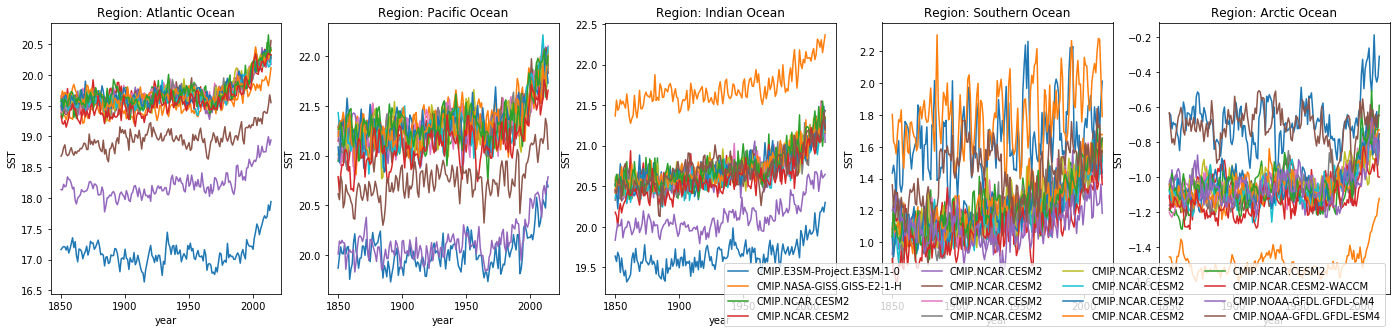

In [44]:
gs = gridspec.GridSpec(1,5)
fig = plt.figure(figsize=(24,5))
ylabel='SST'

for m in data.keys():
    model_name=m.replace('.historical.Omon.gr','')
    for mem_id in data[m].keys():
        for i,b in enumerate(choose_basins): #should be the same basins are in data[m][mem_id]
            f = plt.subplot(gs[0,i])
            basin_name=regions[b]
            field=data[m][mem_id][b]
            field.plot(label=model_name)
            f.set_ylabel(ylabel)
            #f.set_ylim(1.94,2.17)
            plt.title('Region: '+basin_name)

plt.legend(loc='right', bbox_to_anchor=(1,0), ncol=4)
plt.tight_layout()
plt.savefig('../../plots/sst_cmip6.png', bbox_inches='tight', dpi=150)